In [1]:
import lasio
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from prov import identifier


import view_well_file
import interpolation

In [22]:
import importlib
importlib.reload(view_well_file)


<module 'view_well_file' from 'Z:\\Prog\\HACKATHON\\view_well_file.py'>

In [3]:
DATA_DIR = "..\\data\\las"
EXCEL_DIR = "..\\data"

In [4]:
well_idx = []

In [5]:
for filename in os.listdir(DATA_DIR):
    # Print each filename
    well_idx.append(filename.split("_")[0])
    # print(filename)

In [6]:
well_idx = set(well_idx)

In [7]:
len(well_idx)

41

In [8]:
type(list(well_idx)[0])

str

In [9]:
excel = pd.read_excel(EXCEL_DIR + "\\Отбивки пласта АС11-2.xlsx")

In [10]:
upper_bounds = excel.iloc[::2].copy()
upper_bounds.rename(columns={'Z': 'upper'}, inplace=True)
upper_bounds.drop(['Surface', 'MD'], inplace=True, axis=1)

In [11]:
lower_bounds = excel.iloc[1::2].copy()
lower_bounds.rename(columns={'Z': 'lower'}, inplace=True)
lower_bounds.drop(['Surface', 'MD'], inplace=True, axis=1)

In [12]:
target_layers = pd.merge(upper_bounds, lower_bounds, on='Well identifier', how='outer')
target_layers['Well identifier'] = target_layers['Well identifier'].astype(str)
target_layers = target_layers[target_layers['Well identifier'].isin(well_idx)]


In [13]:
target_layers

,Well identifier,upper,lower
1,12,-2161.95,-2183.98
2,13,-2158.72,-2175.36
3,14,-2170.38,-2190.59
4,15,-2170.84,-2188.69
5,16,-2157.70,-2178.94
6,17,-2150.80,-2171.09
7,18,-2146.87,-2167.39
8,19,-2129.24,-2150.87
9,20,-2141.56,-2162.04
10,22,-2129.92,-2146.85


In [14]:
target_layers.iloc[30]

Well identifier         44
upper             -2128.99
lower             -2145.62
Name: 32, dtype: object

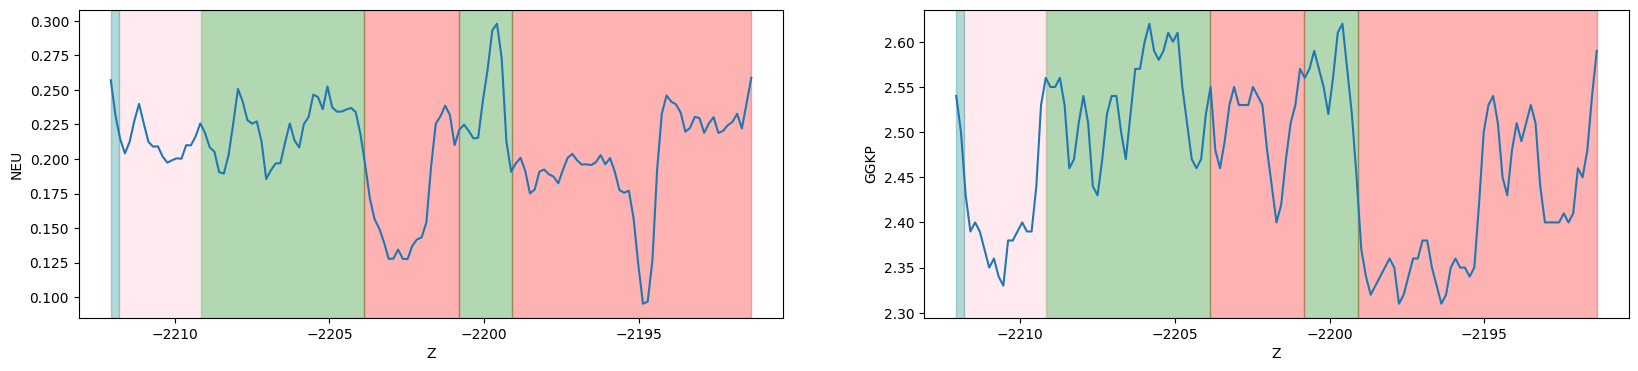

In [23]:
_ = view_well_file.view_well(20, target_layers)

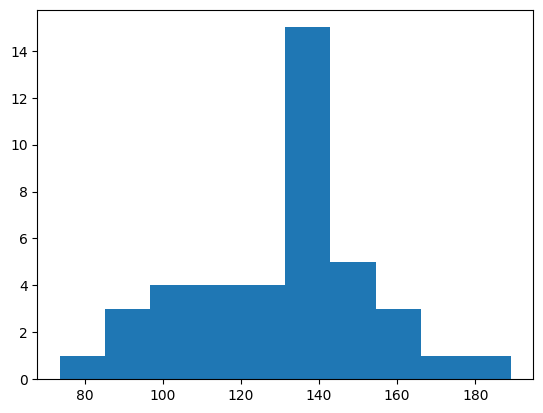

In [61]:
plt.hist((target_layers.upper - target_layers.lower) / 0.1524)
plt.show()

In [115]:
data_ = []

for well_index in range(len(well_idx)):
    las = lasio.read(os.path.join(DATA_DIR, f"{target_layers.iloc[well_index]['Well identifier']}_continuous.las"))
    target_layer_idx = np.where((las['Z'] < target_layers.iloc[well_index].upper) & (las['Z'] > target_layers.iloc[well_index].lower))

    data_.append(list(las["GGKP"][target_layer_idx]))

data = np.empty(len(data_), dtype=object)
for i, sublist in enumerate(data_):
    data[i] = np.array(sublist)
   

In [118]:
data_

[[2.47,
  2.46,
  2.51,
  2.49,
  2.44,
  2.38,
  2.35,
  2.34,
  2.33,
  2.36,
  2.38,
  2.34,
  2.33,
  2.39,
  2.37,
  2.41,
  2.38,
  2.37,
  2.41,
  2.42,
  2.45,
  2.42,
  2.37,
  2.39,
  2.41,
  2.37,
  2.49,
  2.39,
  2.47,
  2.4,
  2.44,
  2.38,
  2.33,
  2.36,
  2.32,
  2.38,
  2.35,
  2.37,
  2.41,
  2.43,
  2.38,
  2.39,
  2.31,
  2.33,
  2.34,
  2.33,
  2.37,
  2.42,
  2.36,
  2.39,
  2.38,
  2.39,
  2.38,
  2.3,
  2.27,
  2.35,
  2.38,
  2.42,
  2.39,
  2.37,
  2.38,
  2.38,
  2.38,
  2.4,
  2.37,
  2.36,
  2.38,
  2.38,
  2.37,
  2.43,
  2.41,
  2.39,
  2.45,
  2.46,
  2.52,
  2.52,
  2.5,
  2.47,
  2.49,
  2.44,
  2.55,
  2.6,
  2.62,
  2.6,
  2.56,
  2.57,
  2.59,
  2.59,
  2.65,
  2.59,
  2.6,
  2.55,
  2.58,
  2.62,
  2.63,
  2.68,
  2.67,
  2.59,
  2.55,
  2.61,
  2.56,
  2.53,
  2.5,
  2.52,
  2.49,
  2.39,
  2.3,
  2.32,
  2.31,
  2.3,
  2.3,
  2.32,
  2.31,
  2.32,
  2.35,
  2.35,
  2.33,
  2.32,
  2.38,
  2.37,
  2.34,
  2.33,
  2.34,
  2.35,
  2.37,
  2.35,
  2

In [119]:
from sklearn.cluster import KMeans

curves = [[1,2,3,4,5], [1,3,5,7,9,11], [2,3,5,6,7,9,11], [1,4,7,10]]

# Преобразуем данные в матрицу numpy
X = curves

# Создаем объект KMeans, указываем число кластеров
kmeans = KMeans(n_clusters=2)

# Обучаем модель на данных
kmeans.fit(X)

# Получаем метки кластеров для каждой кривой
labels = kmeans.labels_

# Выводим результаты
print(labels)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

In [79]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import mahalanobis

scaler = StandardScaler()
scaled_data_ = [scaler.fit_transform([row])[0] for row in data]

scaled_data = np.empty(len(scaled_data_), dtype=object)
for i, sublist in enumerate(scaled_data_):
    scaled_data[i] = np.array(sublist)
# Implementing DBSCAN with Mahalanobis distance
def mahalanobis_distance(x, y):
    # Compute covariance matrix
    cov = np.cov(np.array([x, y]), rowvar=False)
    # Compute inverse of the covariance matrix
    inv_cov = np.linalg.inv(cov)
    # Compute Mahalanobis distance
    return mahalanobis(x, y, inv_cov)

# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2, metric=mahalanobis_distance)
dbscan.fit(scaled_data)

# Get cluster labels
labels = dbscan.labels_

# Print the cluster labels
print("Cluster labels:", labels)

ValueError: setting an array element with a sequence.

30


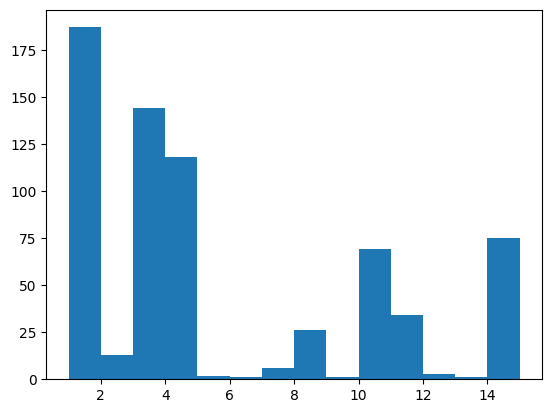

In [37]:
faceis = []

for well_index in range(len(well_idx)):
    las = lasio.read(os.path.join(DATA_DIR, f"{target_layers.iloc[well_index]['Well identifier']}_continuous.las"))
    target_layer_idx = np.where((las['Z'] < target_layers.iloc[well_index].upper) & (las['Z'] > target_layers.iloc[well_index].lower))
    las_dis = lasio.read(os.path.join(DATA_DIR, f"{target_layers.iloc[well_index]['Well identifier']}_discrete.las"))
    target_layer_idx_dis = np.where((las_dis['Z'] < target_layers.iloc[well_index].upper) & (las_dis['Z'] > target_layers.iloc[well_index].lower))
    try:
        faceis.extend(las_dis['FACIES'][np.insert(target_layer_idx_dis, 0, target_layer_idx_dis[0][0]-1)])
    except IndexError:
        print(well_index)
        
faceis = np.array(faceis)
faceis = faceis[~np.isnan(faceis)]

plt.hist(faceis, bins='doane')
plt.show()

мысль - свёртки

depth - длина по стволу - по кривой
sstvd - абсолютная переведённая
z - от моря
одна положительная другая отрицательная разницы нет
лучше либо 2 либо 3

ggkp - гамма каротаж - фоновое гамма излучение

отбивки - границы пласта(субгоризонтальная бурная порода) - точка входа и выхода из целевого пласта - остальное неинтересно
Z - тот же столбик
MD - глубина

дискретные файлы
facies - ручная разметка вручную
log9 - обонзачает то же самое, просто укрупленная, достаточно одной
когда пересекаем глубину начинается код N


neu - нейтронный каротаж - неважно? можно по одной, но с этой +



суть задачи

- кластеризация всех скважин в пределах пластов по форме гамма и второго каротажа
- дальше сложнее: кластеризация кусков формы внутри пласта. То есть каждый график разбить на кусочки - берутся из дискретности. Не
- - Не всегда размечены именно формы, какой-то информации у нас может не быть
- - Цель - не 100% совпадение с разметкой ручной
- - Скользящее окно не дало плодов, проблемы - шум, интересуют крупные, на каждую скважину не более 3

отобразить, посмотреть, обрезать по пласту, поискать основные формы, описаны в какой-тио методике - простейшие геометрические - коробки, пирамиды, воронки
по второй - сложно непонятно